In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(37) # 使得每次运行得到的随机数都一样

In [2]:
# 加载数据集
data_path='E:\PyProjects\DataSet\FireAI/data_timeseries.txt'
df=pd.read_csv(data_path,header=None)
print(df.info()) # 查看数据信息，确保没有错误
print(df.head())
print(df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 4 columns):
0    912 non-null int64
1    912 non-null int64
2    912 non-null float64
3    912 non-null float64
dtypes: float64(2), int64(2)
memory usage: 28.6 KB
None
      0  1      2      3
0  1940  1  98.96  64.81
1  1940  2  10.89  71.38
2  1940  3   6.22  14.39
3  1940  4  67.85  99.24
4  1940  5  31.70   5.09
        0   1      2      3
907  2015   8  40.03  66.65
908  2015   9  23.61   9.50
909  2015  10  22.16  52.35
910  2015  11  18.18  86.57
911  2015  12  74.07  56.77


In [3]:
# 查看原始数据发现，最开始一行的是起始日期，最后一行是终止日期
start=str(df.iloc[0,0])+'-'+str(df.iloc[0,1]) # 1940-1
end=str(df.iloc[-1,0])+'-'+str(df.iloc[-1,1]) # 2015-12
print(end)
dates=pd.date_range(start,end,freq='M') # 构建以月为间隔的日期数据
print(dates[0])
print(dates[-1]) # 注意最后的日期并不是2015-12
print(len(dates)) # 注意少了一个，故而需要加上一个日期，否则无法进行后续操作


2015-12
1940-01-31 00:00:00
2015-11-30 00:00:00
911


In [4]:
start=str(df.iloc[0,0])+'-'+str(df.iloc[0,1]) # 1940-1
if df.iloc[-1,1] %12 ==0: # 如果是12月结尾，需要转为第二年1月
    end=str(int(df.iloc[-1,0])+1)+'-01'
else:
    end=str(df.iloc[-1,0])+'-'+str(int(df.iloc[-1,1])+1)
print(end)

dates=pd.date_range(start,end,freq='M') # 构建以月为间隔的日期数据
print(dates[0])
print(dates[-1]) # 最后一个是2015-12 没有错误
print(len(dates))

2016-01
1940-01-31 00:00:00
2015-12-31 00:00:00
912


In [5]:
df.set_axis(dates)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 912 entries, 1940-01-31 to 2015-12-31
Freq: M
Data columns (total 4 columns):
0    912 non-null int64
1    912 non-null int64
2    912 non-null float64
3    912 non-null float64
dtypes: float64(2), int64(2)
memory usage: 35.6 KB
None
               0  1      2      3
1940-01-31  1940  1  98.96  64.81
1940-02-29  1940  2  10.89  71.38
1940-03-31  1940  3   6.22  14.39
1940-04-30  1940  4  67.85  99.24
1940-05-31  1940  5  31.70   5.09


e:\programsoft\python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  """Entry point for launching an IPython kernel.


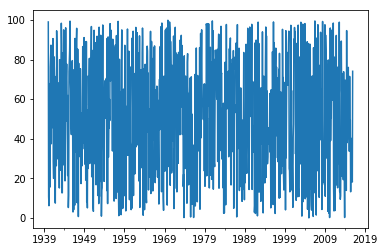

In [6]:
# 画图
df.iloc[:,2].plot() # 画出第2列的时序数据

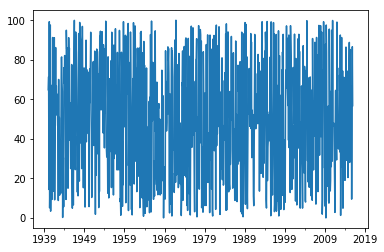

In [7]:
df.iloc[:,3].plot() # 画出第3列的时序数据

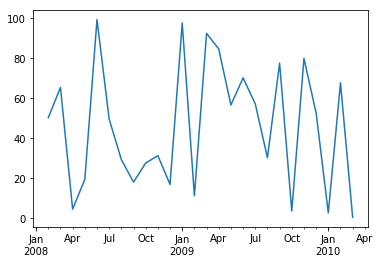

In [8]:
# 上面的图中数据太密集了，我们需要查看部分时间段的数据
start='2008-2'
end='2010-3'
df.iloc[:,2][start:end].plot() 
# 注意这种写法，先获取第二列数据为Series，然后对Series进行时间范围切片即可

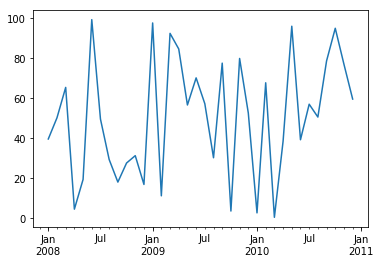

In [9]:
start='2008' # 给定年份来获取数据
end='2010'
df.iloc[:,2][start:end].plot() 


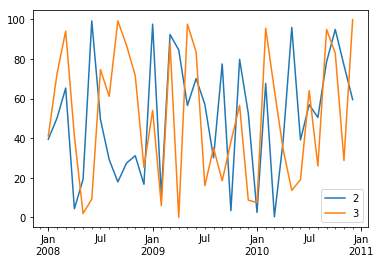

In [10]:
# 上面每次只绘制一列数据，下面同时绘制两列数据
start='2008' # 给定年份来获取数据
end='2010'
df.iloc[:,2:4][start:end].plot()  # 同时绘制第二列和第三列的数据

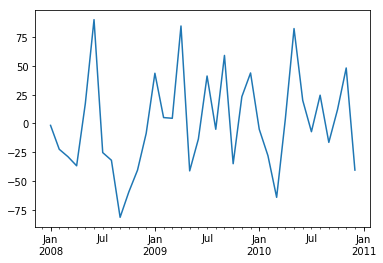

In [11]:
# 也可以绘制两列数据的差异
start='2008' # 给定年份来获取数据
end='2010'
temp_df=df.iloc[:,2][start:end]-df.iloc[:,3][start:end]
temp_df.plot()

e:\programsoft\python\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


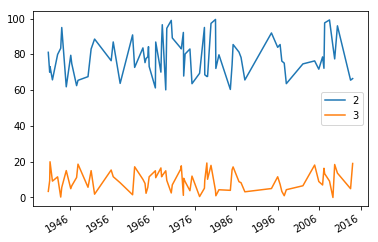

In [12]:
# 还可以筛选出第一个大于某个值，同时第二列小于某个值的数据来绘图
temp_df2=df[df.iloc[:,2]>60][df.iloc[:,3]<20].iloc[:,2:4]
temp_df2.plot()

In [13]:
# 获取数据集的统计数据
part_df=df.iloc[:,2:4] # 只取第二和第三列进行统计
print('Max: \n{}'.format(part_df.max()))
print('Min: \n{}'.format(part_df.min()))
print('Mean: \n{}'.format(part_df.mean()))
# 上面这个方法虽然可以获取Max，Min，Mean值，但是还不如下面这个函数好用

print(part_df.describe()) # 这个可以从整体上看出数据的分布情况

Max: 
2    99.82
3    99.97
dtype: float64
Min: 
2    0.07
3    0.00
dtype: float64
Mean: 
2    51.264529
3    49.695417
dtype: float64
                2           3
count  912.000000  912.000000
mean    51.264529   49.695417
std     29.086753   28.785874
min      0.070000    0.000000
25%     25.410000   25.322500
50%     52.520000   48.015000
75%     76.532500   74.420000
max     99.820000   99.970000


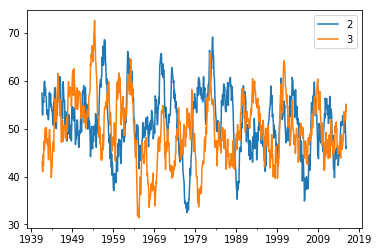

In [14]:
# 计算移动平均值MAn
N=20
MAn=part_df.rolling(N).mean()
MAn.plot()

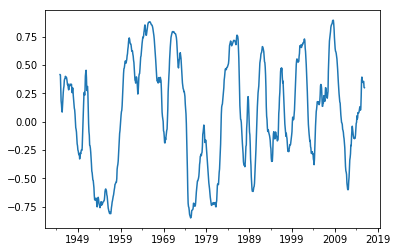

In [15]:
# 计算移动平均值MAn的相关系数
N=20
MAn=part_df.rolling(N).mean()
corr=MAn.iloc[:,0].rolling(window=40).corr(MAn.iloc[:,1])
corr.plot()
